In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
sns.set(style='whitegrid')
sns.set_palette('bright')
import matplotlib.pyplot as plt
import plotly.express as px
import plotly.figure_factory as ff
import plotly.graph_objects as go
from plotly.subplots import make_subplots
from scipy import fftpack
import datetime
from sklearn import mixture
import warnings
warnings.filterwarnings('ignore')
from scipy import fft
from scipy import signal
import math
from acoustics.cepstrum import complex_cepstrum
from acoustics.cepstrum import inverse_complex_cepstrum
from scipy.spatial import distance

In [2]:
def idft2(yr, yi):
    N, x = yr.shape[0], []
    yr = dict(yr.values)
    yi = dict(yi.values)
    for t in range(N):
        real = 0
        for (k,v),(k2,v2) in zip(yr.items(),yi.items()):
            theta1 = t * (2 * math.pi) * k
            theta2 = t * (2 * math.pi) * k2
            real += (v * math.cos(theta1)) - (v2 * math.sin(theta2))
        x.append(real/N)
    return x

In [3]:
#Func gives magnitude of FFT provide dataframe in Time Domain
def freq_mag(df):
    N = df.shape[0]
    y = np.array(df['Value'])
    f = fftpack.fftfreq(len(y))
    yf = fftpack.fft(y)
    fft_data = pd.DataFrame(zip(f,np.abs(yf)),columns=['Freq','Ampli'])
    return fft_data

In [4]:
#Func gives real and imag of FFT provide dataframe in Time Domain
def freq(df):
    N = df.shape[0]
    y = np.array(df['Value'])
    f = fftpack.fftfreq(len(y))
    yf = fftpack.fft(y)
    fft_data1 = pd.DataFrame(zip(f,yf.real),columns=['Freq','Ampli'])
    fft_data2 = pd.DataFrame(zip(f,yf.imag),columns=['Freq','Ampli'])
    return fft_data1,fft_data2

In [5]:
def log_freq(df1, df2):
    df1['Ampli'] = np.log(df1["Ampli"])
    df1['Ampli'] = df1['Ampli'].replace([np.inf, -np.inf], 0)
    df1 = df1.fillna(0)
    df2['Ampli'] = np.log(df2["Ampli"])
    df2['Ampli'] = df2['Ampli'].replace([np.inf, -np.inf], 0)
    df2 = df2.fillna(0)
    return df1, df2

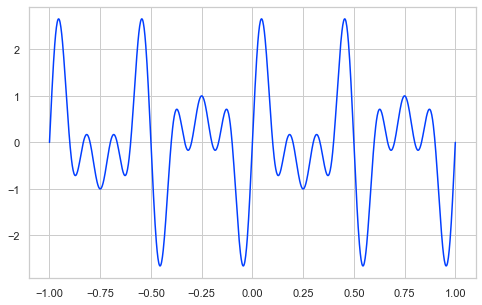

In [8]:
from scipy import signal
import math
plt.figure(figsize=(8,5))
N = 1000
t = np.linspace(-1, 1, N)
s = np.sin(3 * 2 * np.pi * t) + np.sin(5 * 2 * np.pi * t) + np.sin(7 * 2 * np.pi * t)
plt.plot(t,s)

In [10]:
signal_1 = pd.DataFrame(zip(t,s),columns=['Time','Value'])
signal_1

,Time,Value
0,-1.000000,3.673940e-15
1,-0.997998,1.885201e-01
2,-0.995996,3.760565e-01
3,-0.993994,5.616320e-01
4,-0.991992,7.442819e-01
...,...,...
995,0.991992,-7.442819e-01
996,0.993994,-5.616320e-01
997,0.995996,-3.760565e-01
998,0.997998,-1.885201e-01


## Magnitude of Freq

(-0.1, 0.1)

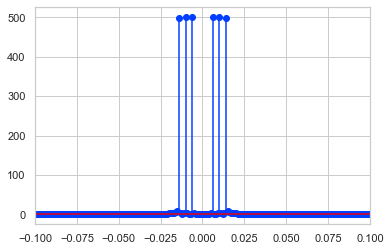

In [11]:
freq_ampli_mag = freq_mag(signal_1)
plt.stem(freq_ampli_mag['Freq'], freq_ampli_mag['Ampli'])
plt.xlim(-0.1, 0.1)

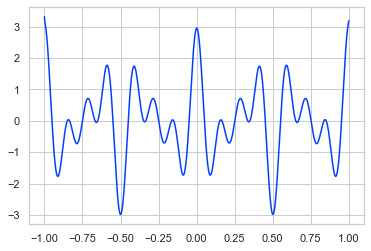

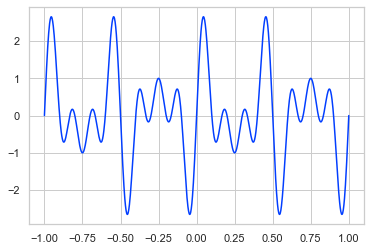

In [12]:
value = list(freq_ampli_mag['Ampli'])
ift = fft.ifft(value)
plt.plot(t,ift)
plt.show()
plt.plot(signal_1["Time"], signal_1["Value"])
plt.show()

## Freq on Real and Imag

(-0.1, 0.1)

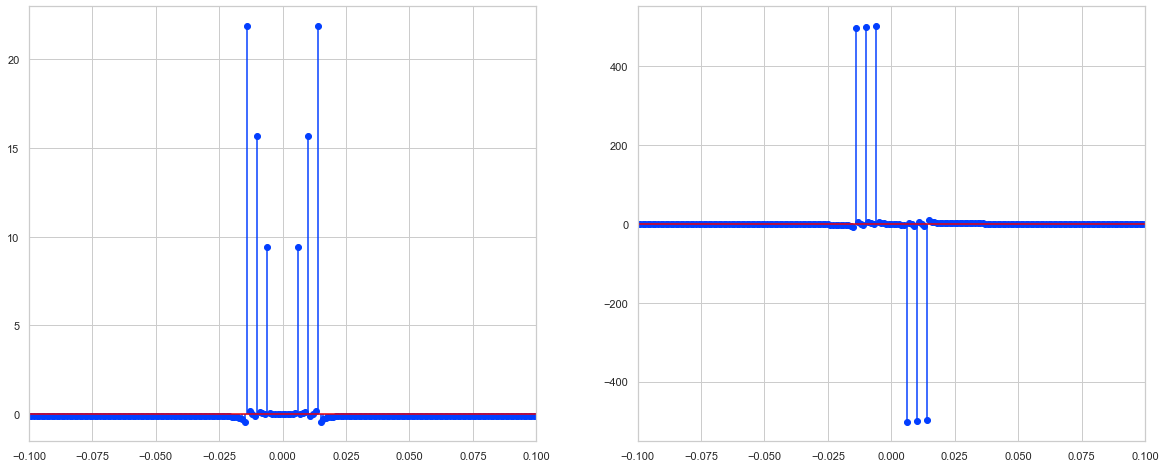

In [18]:
freq_ampli1,freq_ampli1i = freq(signal_1)
fig, axs = plt.subplots(1,2,figsize=(20,8))
axs[0].stem(freq_ampli1['Freq'], freq_ampli1['Ampli'])
axs[0].set_xlim(-0.1, 0.1)
axs[1].stem(freq_ampli1i['Freq'], freq_ampli1i['Ampli'])
axs[1].set_xlim(-0.1, 0.1)

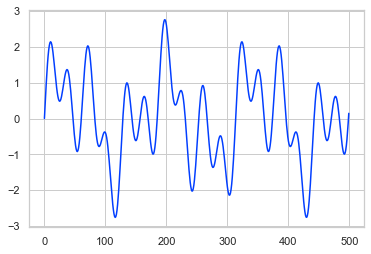

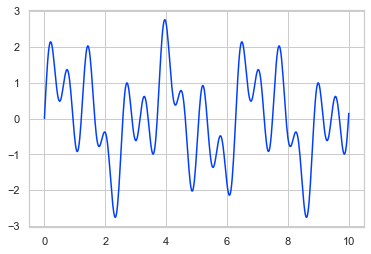

In [11]:
value = idft2(freq_ampli1,freq_ampli1i)
plt.plot(value)
plt.show()
plt.plot(signal_1["Time"], signal_1["Value"])
plt.show()

In [12]:
distance.euclidean(signal_1["Value"],value)

7.558740481189834e-14

Recreating the pattern

## Log Freq

In [13]:
log1, log1i = log_freq(freq_ampli1, freq_ampli1i)

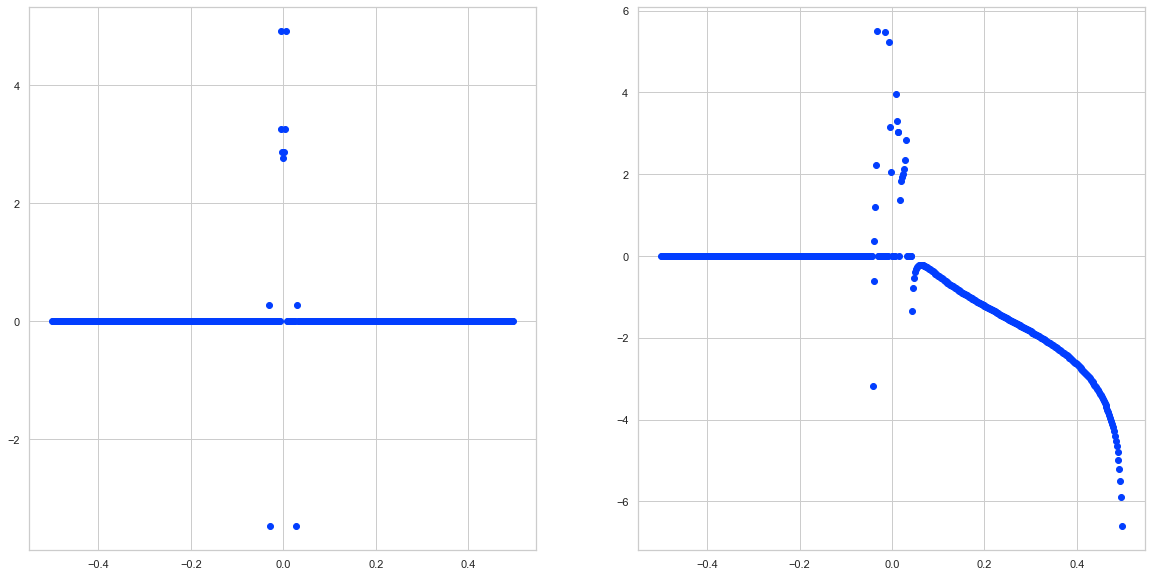

In [14]:
fig, axs = plt.subplots(1,2,figsize=(20,10))
axs[0].scatter(log1['Freq'], log1['Ampli'])
axs[1].scatter(log1i['Freq'], log1i['Ampli'])

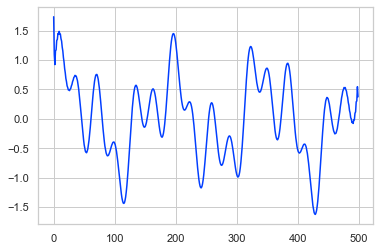

In [15]:
log1["Ampli"] = np.exp(log1["Ampli"])
log1i["Ampli"] = np.exp(log1i["Ampli"])
value = idft2(log1,log1i)
plt.plot(value)

In [16]:
distance.euclidean(signal_1["Value"],value)

13.172134064390724

## Cepstrum

In [16]:
duration = signal_1.shape[0]
fs = 1.0
samples = int(fs*duration)
t = np.arange(samples) / fs
ceps, _ = complex_cepstrum(signal_1['Value'])
print(ceps)

[-1.68209977e+00  3.97247511e+00  1.95848137e+00  1.27784659e+00
  9.30614262e-01  7.16827582e-01  5.69862606e-01  4.61189934e-01
  3.76564993e-01  3.08091332e-01  2.51045830e-01  2.02435514e-01
  1.60275883e-01  1.23202241e-01  9.02475428e-02  6.07090496e-02
  3.40649436e-02  9.92034053e-03 -1.20287303e-02 -3.20199922e-02
 -5.02422013e-02 -6.68474982e-02 -8.19603942e-02 -9.56844121e-02
 -1.08107060e-01 -1.19303601e-01 -1.29339941e-01 -1.38274853e-01
 -1.46161714e-01 -1.53049844e-01 -1.58985573e-01 -1.64013052e-01
 -1.68174904e-01 -1.71512713e-01 -1.74067401e-01 -1.75879508e-01
 -1.76989396e-01 -1.77437384e-01 -1.77263830e-01 -1.76509173e-01
 -1.75213932e-01 -1.73418678e-01 -1.71163983e-01 -1.68490338e-01
 -1.65438069e-01 -1.62047227e-01 -1.58357475e-01 -1.54407966e-01
 -1.50237211e-01 -1.45882952e-01 -1.41382028e-01 -1.36770246e-01
 -1.32082249e-01 -1.27351393e-01 -1.22609629e-01 -1.17887385e-01
 -1.13213468e-01 -1.08614958e-01 -1.04117127e-01 -9.97433596e-02
 -9.55150844e-02 -9.14517

-3.0


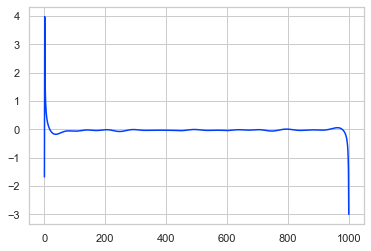

In [17]:
print(_)
plt.plot(t, ceps)

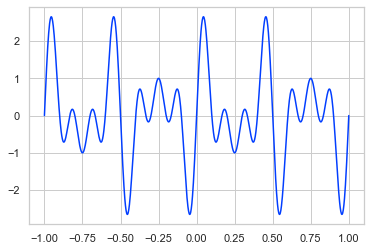

In [18]:
incep = inverse_complex_cepstrum(ceps, np.array(-3.0))    # inverse ceps
plt.plot(signal_1['Time'], incep)

In [19]:
distance.euclidean(signal_1["Value"],incep)

5.534725733014734e-14

# GMM of All

## GMM on Time Series

In [21]:
def GMM_fit(df):
    dfx = df
    lowest_bic = np.infty
    bic = []
    n_components_range = range(1, 100)
    cv_types = ['spherical', 'tied', 'diag', 'full']
    for cv_type in cv_types:
        for n_components in n_components_range:
            # Fit a Gaussian mixture with EM
            gmm = mixture.GaussianMixture(n_components=n_components,
                                          covariance_type=cv_type)
            gmm.fit(dfx)
            bic.append(gmm.bic(dfx))
            if bic[-1] < lowest_bic:
                lowest_bic = bic[-1]
                best_gmm = gmm
    return best_gmm

In [22]:
ts = GMM_fit(signal_1)
print(ts, '\n')
print('WEIGHTS -', ts.weights_, '\n')
print('MEANS (Col 1: Freq; Col 2: Amplitude) - \n', ts.means_, '\n')

GaussianMixture(n_components=53) 

WEIGHTS - [0.03598611 0.0280009  0.02000608 0.01797952 0.00905088 0.02213244
 0.0159941  0.02788452 0.01077809 0.01240812 0.00763874 0.00599958
 0.00596836 0.01199714 0.03043943 0.00777021 0.02549803 0.02614506
 0.01997729 0.03510867 0.00797307 0.0280121  0.00592667 0.01200354
 0.037999   0.02200343 0.00999924 0.02000563 0.02092461 0.00762719
 0.03208454 0.01548933 0.02836185 0.01626145 0.01799935 0.01157892
 0.01959134 0.0099988  0.02301516 0.03037202 0.0464813  0.01546912
 0.00798778 0.01998187 0.00786705 0.00399414 0.03216889 0.00998925
 0.02801535 0.02000285 0.01403177 0.01602156 0.02399853] 

MEANS (Col 1: Freq; Col 2: Amplitude) - 
 [[ 5.94158517e+00 -1.33330720e+00]
 [ 2.51503375e+00 -9.17128656e-01]
 [ 7.88569220e+00  6.21459346e-01]
 [ 6.21334770e-01  9.14555071e-01]
 [ 6.51370510e+00  2.06331155e+00]
 [ 4.40809313e+00  6.00017621e-01]
 [ 9.92972612e+00 -5.67333092e-01]
 [ 2.15511788e+00 -1.50659623e+00]
 [ 8.60599940e+00 -2.69537556e+00]
 [ 

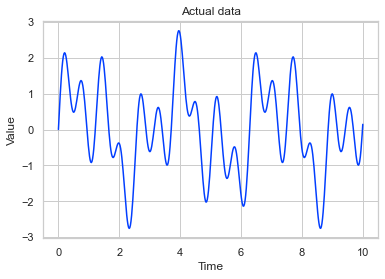

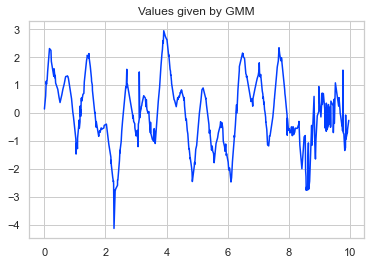

In [23]:
z,_ = ts.sample(500)
plt.title('Actual data')
sns.lineplot(signal_1['Time'], signal_1['Value'])
plt.show()
plt.title('Values given by GMM')
sns.lineplot(z[:,0],z[:,1])
plt.show()

In [24]:
distance.euclidean(signal_1["Value"], z[:, 1])

39.60704690016474

## GMM on Real and Img Freq

In [25]:
freq_ampli1,freq_ampli1i = freq(signal_1)

In [26]:
fr = GMM_fit(freq_ampli1)                        # GMM on real part of FFT data
fi = GMM_fit(freq_ampli1i)                      # GMM on imaginary part of FFT data

In [27]:
print(fr, '\n')
print('WEIGHTS -', fr.weights_, '\n')
print('MEANS (Col 1: Freq; Col 2: Amplitude) - \n',fr.means_, '\n')

GaussianMixture(n_components=34) 

WEIGHTS - [0.09631665 0.004      0.004      0.004      0.004      0.004
 0.004      0.05182928 0.004      0.004      0.004      0.00399999
 0.03048607 0.12835706 0.004      0.002      0.04913503 0.02494269
 0.008      0.004      0.10585136 0.0319672  0.06809064 0.004
 0.058695   0.03728951 0.008      0.02433295 0.004      0.07406193
 0.01202925 0.03897292 0.004      0.08964248] 

MEANS (Col 1: Freq; Col 2: Amplitude) - 
 [[ 3.92148778e-01 -2.30410629e-01]
 [ 0.00000000e+00  1.36306353e+02]
 [ 0.00000000e+00 -2.71419545e+01]
 [ 0.00000000e+00  1.75862059e+01]
 [ 0.00000000e+00 -4.17952277e+01]
 [ 0.00000000e+00 -5.77423610e+00]
 [ 0.00000000e+00  2.60527382e+01]
 [-1.66953946e-01 -2.58371350e-01]
 [ 0.00000000e+00 -1.04632671e+01]
 [ 0.00000000e+00 -2.81475760e+00]
 [ 0.00000000e+00 -2.34062547e+01]
 [-4.10413233e-10 -1.12960968e+00]
 [ 8.46032920e-02 -3.67877857e-01]
 [-4.35647671e-01 -2.29660254e-01]
 [ 0.00000000e+00  1.32406243e+00]
 [ 0.00000000e+

In [28]:
print(fi, '\n')
print('WEIGHTS -', fi.weights_, '\n')
print('MEANS (Col 1: Freq; Col 2: Amplitude) - \n',fi.means_, '\n')

GaussianMixture(n_components=55) 

WEIGHTS - [0.05600668 0.002      0.002      0.002      0.002      0.002
 0.002      0.002      0.002      0.002      0.002      0.004
 0.04703041 0.002      0.002      0.002      0.002      0.002
 0.06904434 0.002      0.002      0.002      0.002      0.002
 0.002      0.002      0.06431964 0.002      0.06417016 0.002
 0.05404361 0.05113472 0.002      0.002      0.004      0.04706062
 0.002      0.05607027 0.10394993 0.002      0.002      0.002
 0.0199788  0.00599988 0.002      0.002      0.03814026 0.002
 0.002      0.09087439 0.06169703 0.07379283 0.002      0.01668642
 0.002     ] 

MEANS (Col 1: Freq; Col 2: Amplitude) - 
 [[ 2.28993840e-01  2.47828573e-01]
 [ 1.60000000e-02 -2.37208878e+02]
 [-1.60000000e-02  2.37208878e+02]
 [-1.40000000e-02 -2.04853189e+01]
 [ 1.00000000e-02  2.71756506e+01]
 [-6.00000000e-03  1.87987138e+02]
 [ 6.00000000e-03 -1.87987138e+02]
 [-8.00000000e-03 -5.22547672e+01]
 [ 8.00000000e-03  5.22547672e+01]
 [ 2.60000000e-

In [29]:
z1,_ = fr.sample(500)
z1i,_ = fi.sample(500)

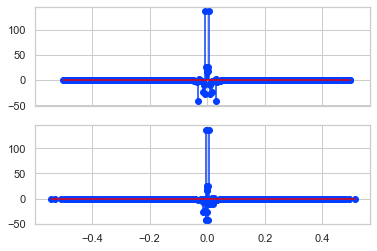

In [30]:
fig, ax = plt.subplots(2, sharex='all', sharey='all')
ax[0].stem(freq_ampli1['Freq'], freq_ampli1['Ampli'])
#plt.show()
ax[1].stem(z1[:, 0], z1[:, 1])
plt.show()

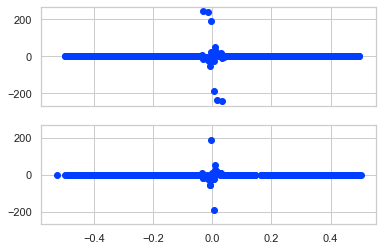

In [31]:
fig, ax = plt.subplots(2, sharex='all', sharey='all')
ax[0].scatter(freq_ampli1i['Freq'], freq_ampli1i['Ampli'])
#plt.show()
ax[1].scatter(z1i[:, 0], z1i[:, 1])
plt.show()

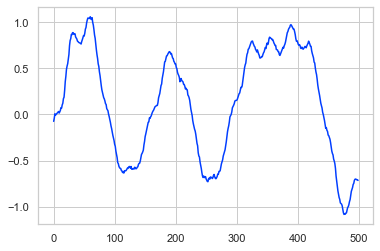

In [32]:
fr_d = pd.DataFrame(zip(z1[:,0],z1[:,1]),columns=['Freq','Ampli'])
fi_d = pd.DataFrame(zip(z1i[:,0],z1i[:,1]),columns=['Freq','Ampli'])
value = idft2(fr_d,fi_d)
plt.plot(value)

In [33]:
distance.euclidean(signal_1["Value"], value)

25.683098761559116

## GMM on Log-Freq

In [34]:
lr = GMM_fit(log1)                        # GMM on real part of FFT data
li = GMM_fit(log1i)

In [35]:
print(lr, '\n')
print('WEIGHTS -', lr.weights_, '\n')
print('MEANS (Col 1: Freq; Col 2: Amplitude) - \n',lr.means_, '\n')

GaussianMixture(covariance_type='tied', n_components=12) 

WEIGHTS - [0.15821649 0.004      0.004      0.004      0.16329463 0.004
 0.002      0.16725656 0.15283724 0.16631627 0.004      0.17007882] 

MEANS (Col 1: Freq; Col 2: Amplitude) - 
 [[ 2.52873576e-01  1.00000000e+00]
 [ 0.00000000e+00  1.36306353e+02]
 [ 0.00000000e+00  1.75862059e+01]
 [ 0.00000000e+00  2.60527382e+01]
 [-4.14967121e-01  1.00000000e+00]
 [ 0.00000000e+00  1.32406243e+00]
 [ 0.00000000e+00  1.58725523e+01]
 [ 4.11377444e-01  1.00000000e+00]
 [-2.61761759e-01  1.00000000e+00]
 [ 9.10273958e-02  1.00000000e+00]
 [ 0.00000000e+00  3.10921561e-02]
 [-1.01040407e-01  1.00000000e+00]] 



In [36]:
print(li, '\n')
print('WEIGHTS -', li.weights_, '\n')
print('MEANS (Col 1: Freq; Col 2: Amplitude) - \n',li.means_, '\n')

GaussianMixture(n_components=22) 

WEIGHTS - [0.16775953 0.002      0.002      0.002      0.002      0.004
 0.09706608 0.004      0.002      0.02266634 0.004      0.002
 0.002      0.002      0.05348396 0.002      0.15094306 0.33419867
 0.0689895  0.002      0.004      0.06889285] 

MEANS (Col 1: Freq; Col 2: Amplitude) - 
 [[-4.07905598e-01  1.00000000e+00]
 [-1.60000000e-02  2.37208878e+02]
 [ 1.00000000e-02  2.71756506e+01]
 [-6.00000000e-03  1.87987138e+02]
 [ 8.00000000e-03  5.22547672e+01]
 [-4.00000000e-03  8.75704752e+00]
 [ 2.99601775e-01  1.60061930e-01]
 [ 1.30000000e-02  2.06035129e+01]
 [-3.20000000e-02  2.42162669e+02]
 [ 2.72499088e-02  6.47389857e-01]
 [-9.00000000e-03  3.65473512e+00]
 [ 3.00000000e-02  1.71502595e+01]
 [-4.00000000e-03  2.32965671e+01]
 [ 2.20000000e-02  6.95196667e+00]
 [ 1.55267039e-01  4.02982292e-01]
 [ 2.80000000e-02  1.03767750e+01]
 [ 4.23442195e-01  5.45288970e-02]
 [-1.67775955e-01  1.00000000e+00]
 [ 2.16526642e-01  2.68803822e-01]
 [ 2.0000

In [37]:
z2,_ = lr.sample(500)
z2i,_ = li.sample(500)

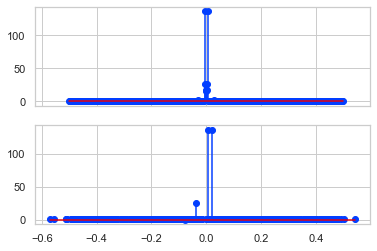

In [38]:
fig, ax = plt.subplots(2, sharex='all', sharey='all')
ax[0].stem(log1['Freq'], log1['Ampli'])
#plt.show()
ax[1].stem(z2[:, 0], z2[:, 1])
plt.show()

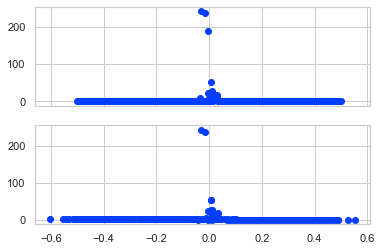

In [39]:
fig, ax = plt.subplots(2, sharex='all', sharey='all')
ax[0].scatter(log1i['Freq'], log1i['Ampli'])
#plt.show()
ax[1].scatter(z2i[:, 0], z2i[:, 1])
plt.show()

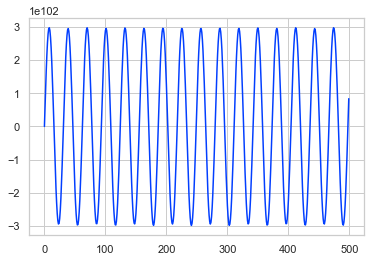

In [40]:
lr_d = pd.DataFrame(zip(z2[:,0],np.exp(z2[:,1])),columns=['Freq','Ampli'])
li_d = pd.DataFrame(zip(z2i[:,0],np.exp(z2i[:,1])),columns=['Freq','Ampli'])
value = idft2(lr_d,li_d)
plt.plot(value)

In [41]:
distance.euclidean(signal_1["Value"],value)

4.6671314484880205e+103

## GMM on Cepstrum

In [42]:
c1 = np.array(ceps).reshape(-1, 1)
c = GMM_fit(c1)

In [43]:
print(c, '\n')
print('WEIGHTS -', c.weights_, '\n')
print('MEANS (Col 1: Freq; Col 2: Amplitude) - \n', c.means_, '\n')

GaussianMixture(covariance_type='diag', n_components=2) 

WEIGHTS - [0.05441586 0.94558414] 

MEANS (Col 1: Freq; Col 2: Amplitude) - 
 [[ 0.11590171]
 [-0.00082246]] 



In [44]:
z3,_ = c.sample(500)

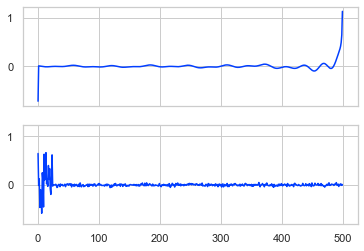

In [45]:
fig, ax = plt.subplots(2, sharex='all', sharey='all')
ax[0].plot(t, ceps)
#plt.show()
ax[1].plot(t, z3.flatten())
plt.show()

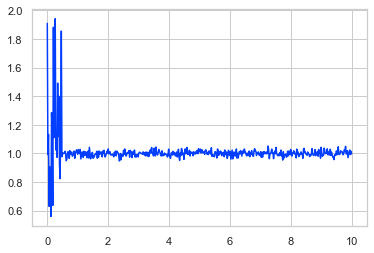

In [46]:
gmm_incep = inverse_complex_cepstrum(z3, np.array(1.0))    # inverse ceps
plt.plot(signal_1['Time'], gmm_incep)

In [47]:
distance.euclidean(signal_1['Value'], gmm_incep)

34.460069032171916